In [1]:
# Import libraries needed.

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

# Library used for styling

import seaborn as sns
sns.set_style("darkgrid")

# KMeans and confusion matrix libraries

from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import plot_confusion_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Import csvfile dataset.

df = pd.read_csv('Documents/Univiersity/HonsProject/MachineLearningcsv/Cleanedcsv1/test.csv')
df[' Label'] = df[' Label'].replace({2:'Attack', 1:'Begnin'}    )
df.isna().any


df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,158.045455,1328,41,2664,44,6954,29200,243,32,Begnin
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,158.045455,1328,41,2664,44,6954,29200,243,32,Begnin
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,0.000000,32,1,0,1,0,290,243,32,Begnin
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,157.952381,1328,41,2728,42,6634,29200,243,32,Begnin
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,0.000000,32,1,0,2,0,243,290,32,Begnin


In [3]:
# Set ' Labels' column for confusion matrix further down.

actual_labels = df[' Label']
samples = df.drop([' Label'], axis=1).values

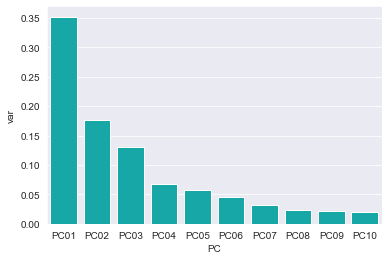

In [4]:
# Standardize the data to have a mean of ~0 and a variance of 1

x_std = StandardScaler().fit_transform(samples)

# Create a PCA instance: Principal Component analysis

n_comp = 10
pca = PCA(n_components=n_comp)
principalComponents = pca.fit_transform(x_std)

# 10 itterations of pca, set by most percentage

pca.explained_variance_ratio_
df_explained = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC%.2d' %(x+1) for x in range(0, n_comp)]})
fig1 = sns.barplot(x='PC',y="var", 
           data=df_explained, color="c")

In [5]:
# Dataset with PCA applied

pc_df = pd.DataFrame(data = principalComponents , 
        columns = ['PC%.2d' %(x+1) for x in range(0, n_comp)])
pc_df['Cluster'] = actual_labels
pc_df.head()

,PC01,PC02,PC03,PC04,PC05,PC06,PC07,PC08,PC09,PC10,Cluster
0,5.651689,3.721861,0.621433,1.352071,1.197274,-1.262561,0.276193,-0.013081,0.381420,-0.685876,Begnin
1,5.653488,3.719977,0.621833,1.351173,1.198682,-1.261009,0.276575,-0.012861,0.381988,-0.686795,Begnin
2,-1.104419,0.184852,0.340234,0.002910,0.124493,0.192435,-0.313769,-0.057500,0.407729,-0.572798,Begnin
3,5.628867,3.664240,0.525703,1.371979,1.212677,-1.269490,0.275070,-0.015246,0.396067,-0.687139,Begnin
4,-1.159536,0.249160,0.413655,0.076241,0.379738,0.085807,-1.188425,-0.090880,0.065035,1.342410,Begnin


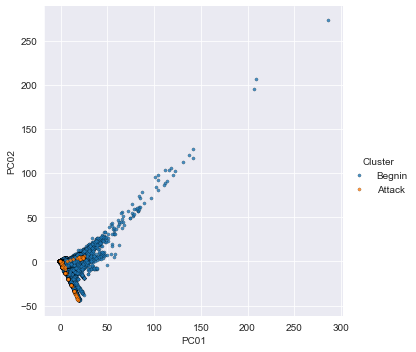

In [6]:
# Actual representation of Begnin and Attack clusters

fig2 = sns.lmplot( x="PC01", y="PC02",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={'s':10, 'edgecolors':"black", 'linewidth':.2}) # specify the point size


In [7]:
# KMeans clusering with 2 clusters.

kmeans = KMeans(n_clusters=2)

#kmeans.fit(samples)

y_km = kmeans.fit_predict(pc_df.drop(['Cluster'],axis=1))
y_km

kmeans.labels_

clusters = kmeans.cluster_centers_

# compute values for Elbow Method to define K

wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(samples)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

Text(0, 0.5, 'Within-cluster Sum of Squares - WCSS')

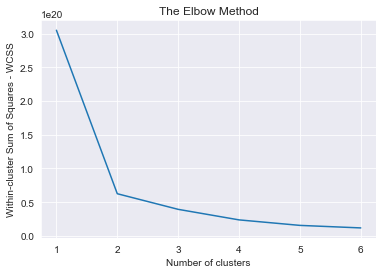

In [11]:
#Elbow graph

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares - WCSS')

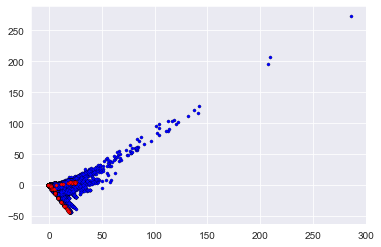

In [8]:
# Allow plottig with specified columns (n,m)

n = 0
m = 1

colA = pc_df.columns[n]
colB = pc_df.columns[m]

fig3 = plt.figure()
plt.scatter(pc_df.loc[pc_df['Cluster'] == 'Begnin'][colA], pc_df.loc[pc_df['Cluster'] == 'Begnin'][colB], s=10, edgecolors="black", linewidth=.2, color='blue')
plt.scatter(pc_df.loc[pc_df['Cluster'] == 'Attack'][colA], pc_df.loc[pc_df['Cluster'] == 'Attack'][colB], s=10, edgecolors="black", linewidth=.2, color='red')



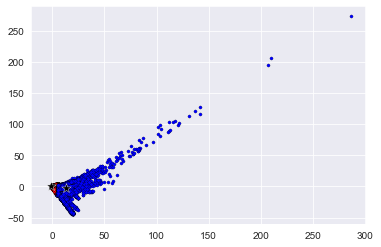

In [9]:
# Show cluster centers

fig4 = plt.figure()
plt.scatter(pc_df[y_km == 0][colA], pc_df[y_km == 0][colB], s=10, edgecolors="black", linewidth=.2, color='red')
plt.scatter(pc_df[y_km == 1][colA], pc_df[y_km == 1][colB], s=10, edgecolors="black", linewidth=.2, color='blue')




plt.scatter(clusters[0][n], clusters[0][m], marker='*', s=100, edgecolors="white", linewidth=.4, color='black')
plt.scatter(clusters[1][n], clusters[1][m], marker='*', s=100, edgecolors="white", linewidth=.4, color='black')



In [10]:
# Compute confusion matrix

labels = {0:'Attack',1:'Begnin'}    
y_true = list(actual_labels)   
y_pred = [ labels[x] for x in list(y_km) ]    
    
cnf_matrix = confusion_matrix(y_true, y_pred, labels=['Attack','Begnin'])

cmtx = pd.DataFrame(
    confusion_matrix(y_true, y_pred, labels=['Attack','Begnin']), 
    index=['true:Attack', 'true:Begnin'], 
    columns=['pred:Attack', 'pred:Begnin'])

cmtx

,pred:Attack,pred:Begnin
true:Attack,158534,230
true:Begnin,55341,13187
